**ПРИНЯТИЕ РЕШЕНИЙ В БИЗНЕСЕ.** 

Анализируем крупный интернет-магазин. 

**Задача проекта:** подготовить список гипотез для увеличения выручки.
Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

In [1]:
# библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import math
from IPython.display import display
from scipy import stats as st

Изучим данные и информацию

In [2]:
hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [4]:
# приведем столбцы к одному формату

hypothesis = hypothesis.rename(columns={'Hypothesis': 'hypothesis','Reach': 'reach','Impact': 'impact', 'Confidence': 'confidence', 'Efforts': 'efforts'})

In [5]:
pd.set_option('max_colwidth', 150)
hypothesis.head(10)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**ЧАСТЬ 1-ая. Приоритизация гипотез.**
- **Задача:** Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

In [6]:
hypothesis['ICE'] = round (hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'], 2)

In [7]:
pd.set_option('max_colwidth', 150)

In [8]:
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Задача:** Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета. 

In [9]:
hypothesis['RICE'] = (
    (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts'])

In [10]:
pd.set_option('max_colwidth', 150)

In [11]:
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Задача:** Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло:
- При применении RICE вместо ICE с третьего места на первое вышла гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", потому что она с достаточной силой повлияет на всех пользователей. Гипотеза "Запустить акцию, дающую скидку на товар в день рождения" опустилась на пятое место из-за низкого охвата: чтобы затронуть всех пользователей потребуется целый год.

**ЧАСТЬ 2-ая. Анализ A/B-теста.**

Загрузим данные и изучим информацию

In [14]:
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')

In [15]:
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [16]:
orders = orders.rename(columns={'transactionId': 'transaction_id','visitorId': 'visitor_id'})

In [17]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [21]:
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [22]:
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [23]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [24]:
# проверим наличие дубликатов 
orders.duplicated().sum()

0

In [25]:
# преобразуем столбцы date в нужный формат даты

orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [26]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [27]:
# проверим наличие дубликатов 
visitors.duplicated().sum()

0

Тип данных в колонках с датами изменён на корректный.
Дубликатов и пропусков нет.

**1. Построим график кумулятивной выручки по группам.**

In [28]:
datesGroups = orders[['date', 'group']].drop_duplicates().reset_index(drop=True)

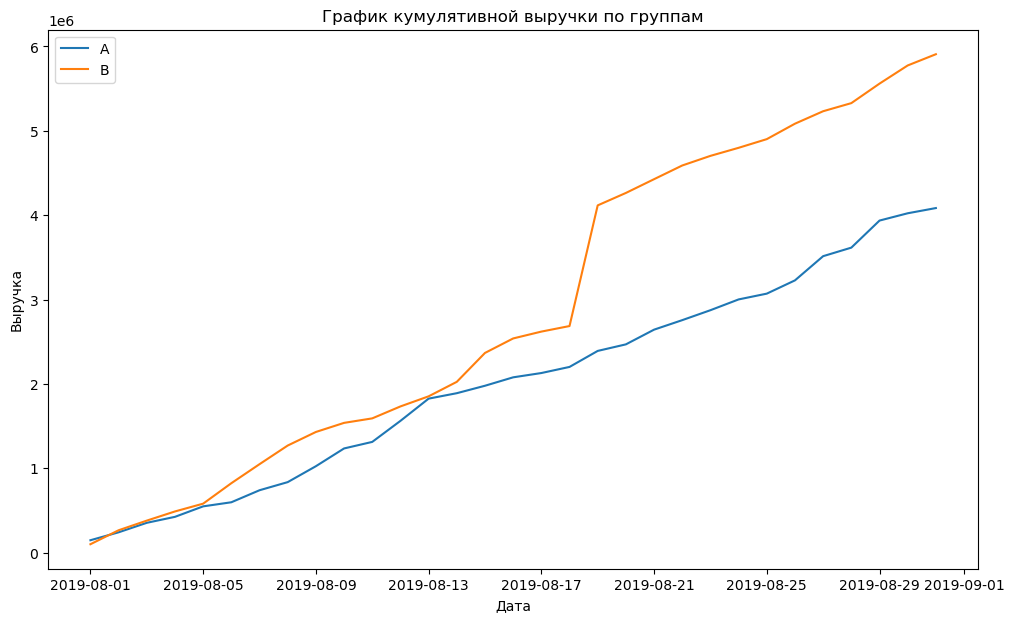

In [29]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id' : 'nunique',
            'visitor_id' : 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('График кумулятивной выручки по группам')
plt.legend();

**Вывод:** Выручка в обеих группах растёт, что хорошо. В группе **B** выручка выше практически на протяжении всего месяца, но также в этой группе наблюдается сильный скачок с 18 на 19 число, что может сигнализировать о всплесках числа заказов либо об очень дорогих заказах.

**2. Построим график кумулятивного среднего чека по группам.**

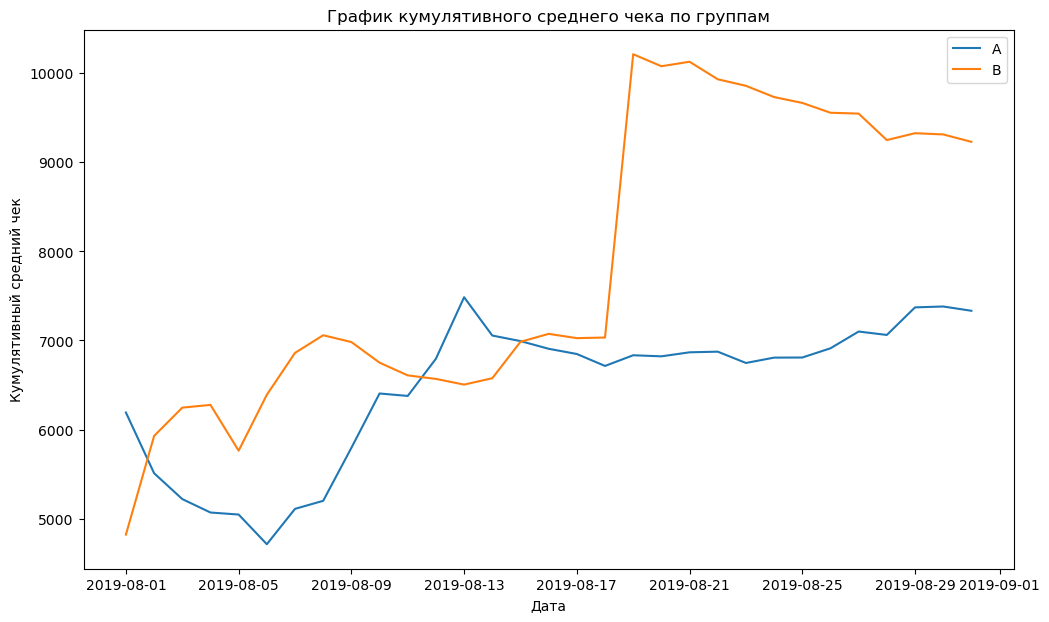

In [30]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

plt.figure(figsize=(12, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.ylabel('Кумулятивный cредний чек')
plt.xlabel('Дата')
plt.title('График кумулятивного среднего чека по группам')
plt.legend();

**Вывод:** К концу графика средний чек стабилизируется. Скорее всего, в группу B в середине теста попали крупные заказы (резкий всплеск на графике). Возможно нужно больше данных, чтобы прийти к реальному среднему чеку.

**3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A.**

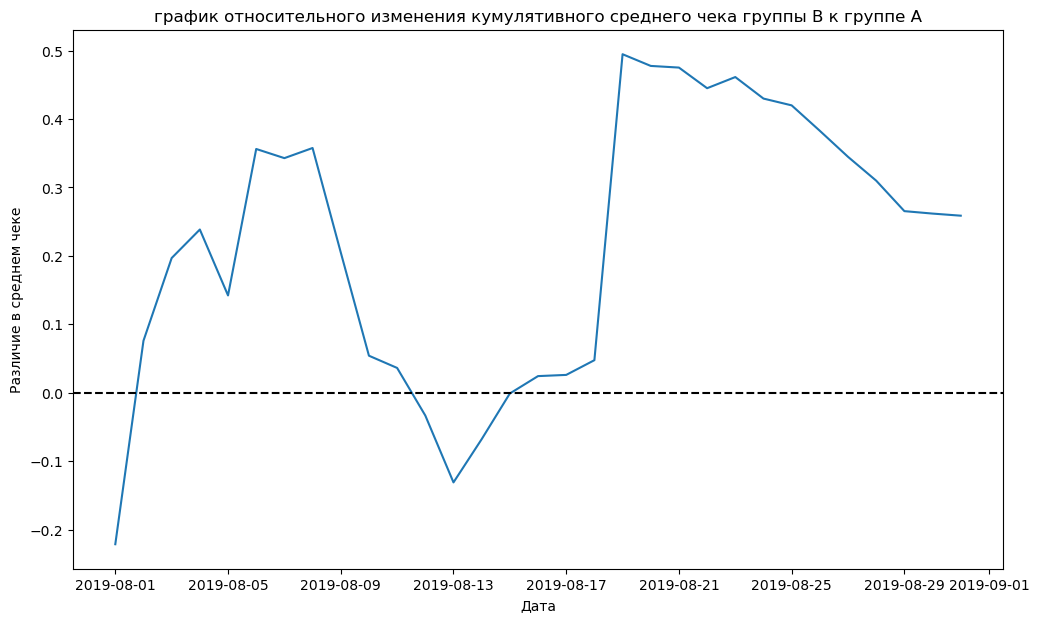

In [31]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

plt.figure(figsize=(12, 7))
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.ylabel('Различие в среднем чеке')
plt.xlabel('Дата')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('график относительного изменения кумулятивного среднего чека группы B к группе A');

**Вывод:** Ближе к середине теста 13.08 график опускается в худшую за время теста для B точку.
Ещё на графике резко «скачат» некоторые дни, например 05.08 или 08.08, но особенно выделяется, конечно скачок 18.08. Очевидно есть выбросы. Результаты теста резко менялись в некоторые даты, возможно тогда были сделаны анамальные заказы. 

**4. Посторим график кумулятивного среднего количества заказов на посетителя по группам.**

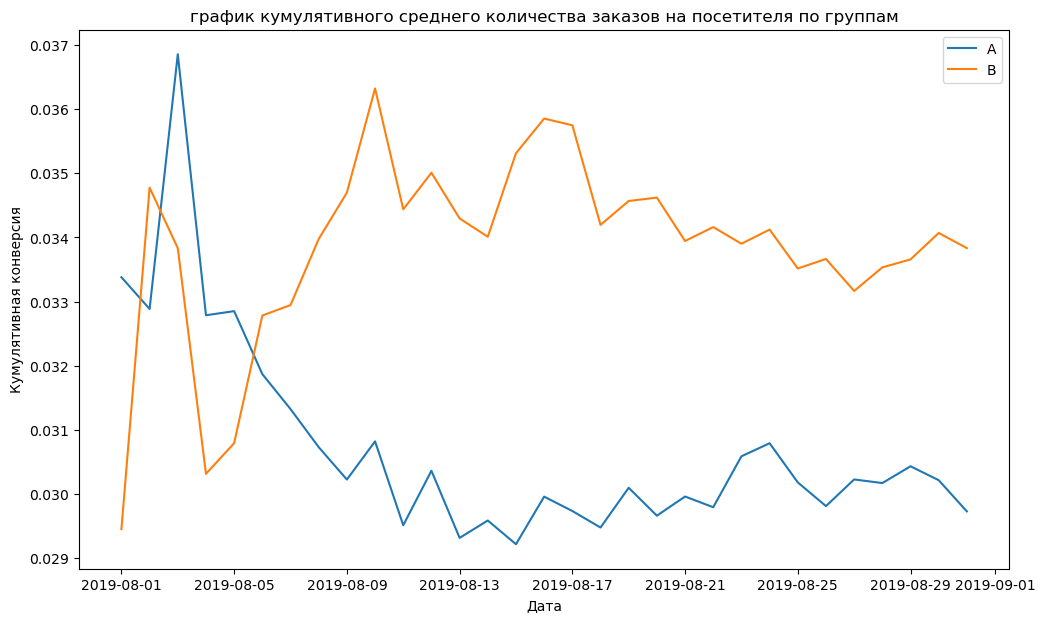

In [32]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(12, 7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.ylabel('Кумулятивная конверсия')
plt.xlabel('Дата')
plt.title('график кумулятивного среднего количества заказов на посетителя по группам');
plt.legend();

**Вывод:** Группы колебались около одного значения, но затем конверсия группы B вырвалась вперёд и зафиксировалась, а конверсия группы A просела и также зафиксировалась.

**5. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.**

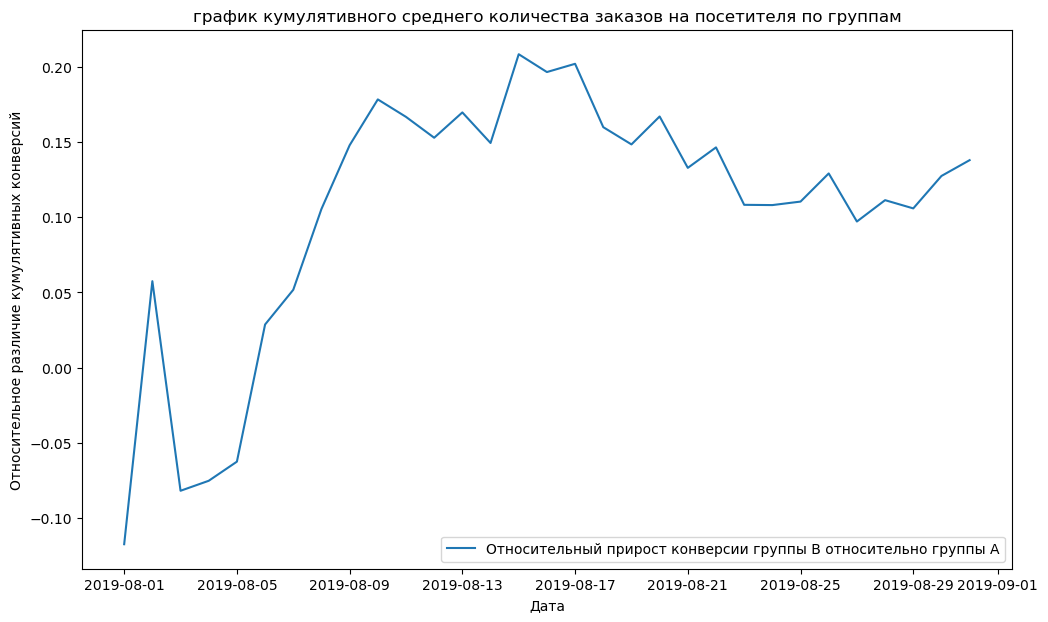

In [33]:
cumulativeData['conversion'] = (cumulativeData['orders'] / cumulativeData['visitors'])
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 7))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.ylabel('Относительное различие кумулятивных конверсий')
plt.xlabel('Дата')
plt.title('график кумулятивного среднего количества заказов на посетителя по группам')
plt.legend();

**Вывод:** В начале теста группа B просела относительно группы A, затем резко выросла и стабилизировалась.

**6. Построим точечный график количества заказов по пользователям.**

In [34]:
ordersByUsers = orders.groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsers.columns = ['visitor_id','orders']
ordersByUsers.head(10)

,visitor_id,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
5,47206413,1
6,48147722,1
7,54447517,1
8,56960363,1
9,66685450,1


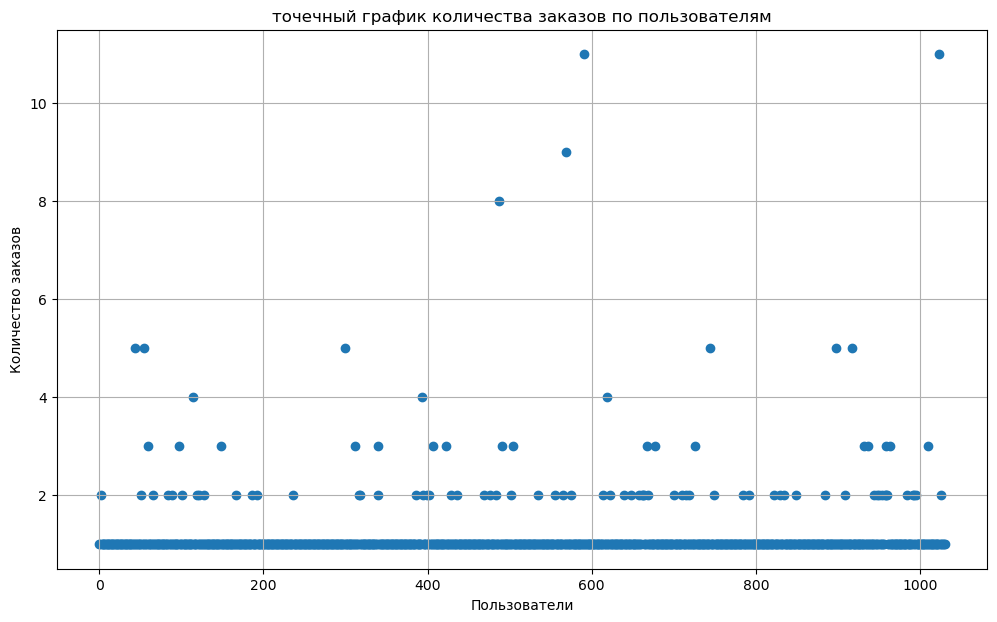

In [35]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(12, 7))
plt.grid(True)
plt.title('точечный график количества заказов по пользователям')
ax = plt.gca()
ax.set_xlabel('Пользователи')
ax.set_ylabel('Количество заказов')
plt.scatter(x_values, ordersByUsers['orders']);

**Вывод:** Большинство покупателей заказывали только один раз. Однако есть пользователи с 2-5 заказами тоже значительна. Их точная доля не ясна — непонятно, считать их аномалиями или нет.

**7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.**

In [36]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

**Вывод:** Не более 5% пользователей оформляли больше двух заказов. И 1% пользователей заказывал более четырёх раз. 
Примем 2 заказа на одного пользователя за нижнюю границу числа заказов.

**8. Построем точечный график стоимостей заказов.**

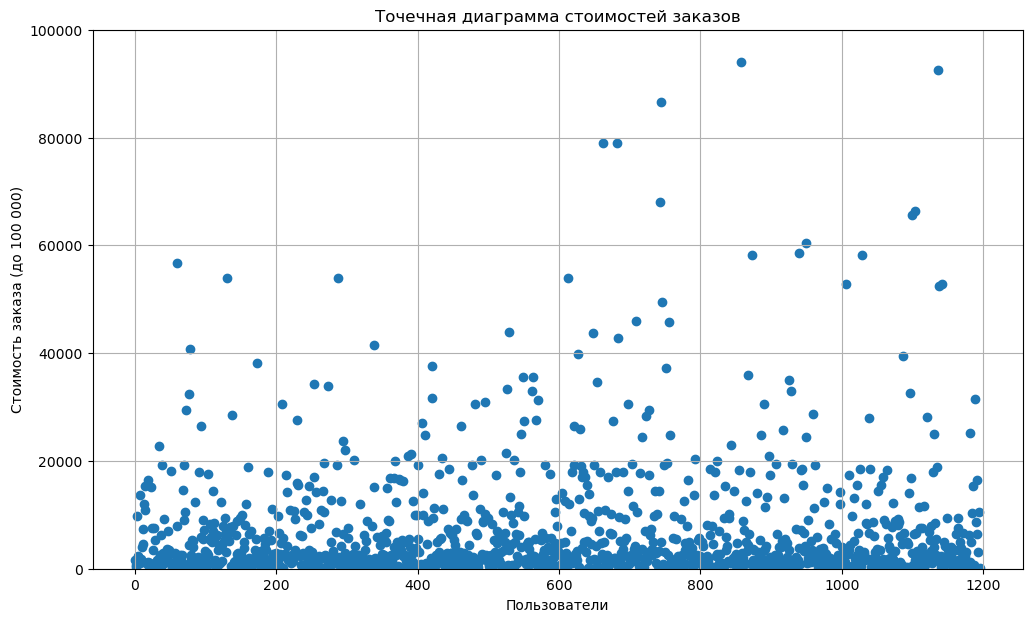

In [37]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(12, 7))
plt.grid(True)
plt.title('Точечная диаграмма стоимостей заказов')
ax = plt.gca()
ax.set_xlabel('Пользователи')
ax.set_ylabel('Стоимость заказа (до 100 000)')
plt.ylim(0, 100000)
plt.scatter(x_values, orders['revenue']);

**Вывод:** Большинство заказов не превышает 20 000, но есть выбросы в 100 000 и возможно больше.

**9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.**

In [38]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

**Вывод:** Не более 5% заказов дороже 28 000 рублей.
И только 1% заказов дороже 58 234 рублей.
Разумно выбрать 58 234 за нижнюю границу стоимости заказов, и отсеять аномальных пользователей по ней.

**10. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.**

Сформулируем гипотезы.
- Нулевая: различий в среднем количестве заказов между группами нет. 
- Альтернативная: различия в среднем между группами есть.
Начнём с подготовки данных.

In [39]:
visitors.head(2)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619


In [40]:
orders.head(2)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B


In [41]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [42]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data.sample(3)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
20,2019-08-21,23,174309,14,163077,385,2643838,437,4426892,646,656,12850,12874
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
27,2019-08-28,17,101122,28,96008,512,3615820,576,5328268,594,654,16970,17177


In [43]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

alpha = 0.05
results=st.mannwhitneyu(sampleA, sampleB)
print('p-значение: {:.3f}'.format(results.pvalue))
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: "Cтатистически значимых различий в конверсии между группами нет".')
else:
    print('Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в конверсии между группами нет".')

print("Относительный прирост конверсии группы B: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

p-значение: 0.017
Отвергаем нулевую гипотезу: "Cтатистически значимых различий в конверсии между группами нет".
Относительный прирост конверсии группы B: 0.138


**Вывод:** Вывод: p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, - отвергаем. Это значит: по «сырым» данным различия в конверсии групп A и B есть. А относительный выигрыш группы "B" над "A" равен 13.8% .

**11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.**

In [44]:
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

print('p-значение: ', "{0:.3f}".format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-значение:  0.729
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
0.259


**Вывод:** P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами нет. Однако, относительное различие среднего чека между группами по «сырым» данным целых 25,9 % (вероятно из-за аномально дорогих заказов).

**12. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.**

In [45]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233]['visitor_id']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                                       name='orders')],axis=0)
results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-значение: ', "{0:.3f}".format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-значение:  0.010
Отвергаем нулевую гипотезу: разница статистически значима
0.174


**Вывод:** p-value = 0.01 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, - отвергаем. Это значит: и по «очищенным» данным различия в конверсии групп A и B есть. А относительный выигрыш группы "B" над "A" равен 17,4% (выше, чем с «сырыми» данными - 13.8%).

**13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.**

In [46]:
print('Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: {:.3f}'.format(
orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()-1))
       
       
results = st.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
                             orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])
print('P-value: {}'.format(results.pvalue))

Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: -0.020
P-value: 0.7977151576527292


**Вывод:** Как и в случае с сырыми данными, статистическая значимость достигнута не была. Но разница между сегментами сократилась с 25,9% до практически нулевой, средний чек в группе B даже стал незначительно ниже чем в группе A.

**ОБЩИЙ ВЫВОД:**
Варианты решений:
- Остановить тест, зафиксировать победу одной из групп.
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.

По данным различия в конверсии групп A и B есть. Относительный выигрыш группы "B" над "A" равен **17,4%** по "очищенным" и **13,8%** по "сырым" данным.

Оказалось, что и по "сырым" и по "очищенным" данным различия в средних чеках групп A и B отстутствуют, несмотря на то, что средний чек группы B оказался незначительно (на 2%) ниже среднего чека группы A по "очищенным" данным, в то время как по "сырым" данным, он был больше аж на **25,9%.** 
Аномальный заказ убрали и чеки сравнялись.

Результаты тестирования вполне понятны. В итоге можно принять решение и **остановить** тестирование, констатировать успех и победу группы B : группа B значительно лучше (эффективнее) группы A по конверсии, хотя по среднему чеку группы примерно равны.